In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [28]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

In [29]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("One training example shape:", X_train[0].shape)
print("Total categories:", len(set(Y_train)))


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
One training example shape: (28, 28)
Total categories: 10


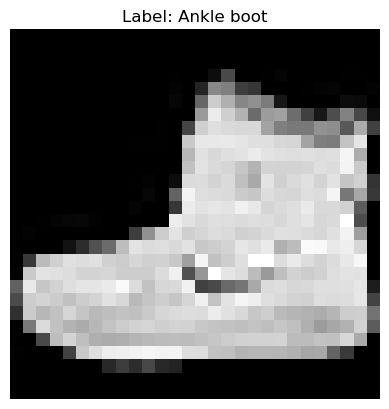

In [35]:
import matplotlib.pyplot as plt

# Define label mapping
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show one sample
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {class_names[Y_train[0]]}")
plt.axis('off')
plt.show()


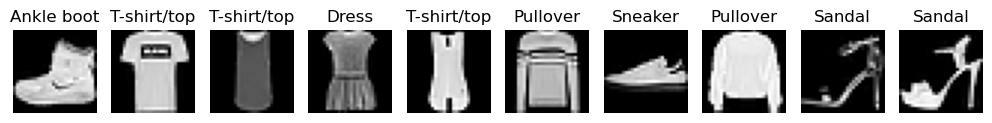

In [37]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[Y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [38]:
X_train = X_train.reshape(-1, 28, 28, 1)/255.0
X_test = X_test.reshape(-1, 28, 28, 1)/255.0

In [39]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8035 - loss: 0.5601 - val_accuracy: 0.8940 - val_loss: 0.3050
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8972 - loss: 0.2860 - val_accuracy: 0.9018 - val_loss: 0.2670
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9191 - loss: 0.2289 - val_accuracy: 0.9100 - val_loss: 0.2509
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9287 - loss: 0.1964 - val_accuracy: 0.9061 - val_loss: 0.2639
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9392 - loss: 0.1685 - val_accuracy: 0.9072 - val_loss: 0.2665
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9494 - loss: 0.1430 - val_accuracy: 0.9032 - val_loss: 0.2754
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9579 - loss: 0.1186 - val_accuracy: 0.9143 - val_loss: 0.2604
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9640 - loss: 0.0993 - 

In [42]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9029 - loss: 0.3700
Test Accuracy: 0.91


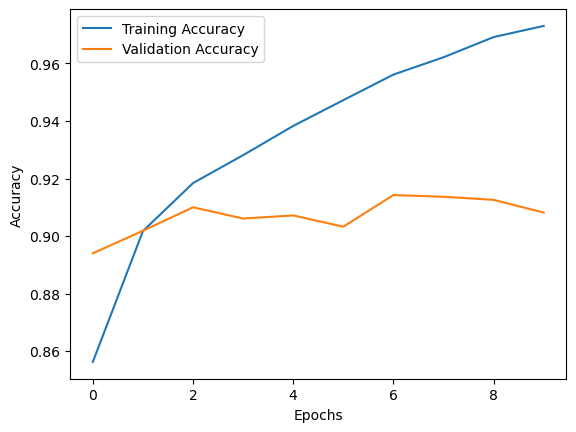

In [43]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()